<a href="https://colab.research.google.com/github/UKashNK/Prediction-of-Product-Sales/blob/main/Prediction_of_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRO

In [55]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [56]:
#loading data
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv")

##basic EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [58]:
#duplicates
df.duplicated().sum()

0

In [59]:
#null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [60]:
#Inconsistent labels
df.select_dtypes("object").nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [61]:
#Item_Fat_Content
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [62]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace("reg","Regular")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [63]:
print(df["Outlet_Size"].value_counts())
print("")
print(df["Outlet_Location_Type"].value_counts())
print("")
print(df["Outlet_Type"].value_counts())
print("")

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64



#Train test split

In [64]:
#features and target
X = df.drop(columns=["Item_Outlet_Sales","Item_Identifier"])
y = df["Item_Outlet_Sales"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [65]:
df["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

#pre_processing object

In [66]:
#creating lists

#orinal
ord_cols = ["Outlet_Size","Outlet_Location_Type","Item_Fat_Content"]

outletsize_order = ["NA","Small","Medium","High"]
outletloca_order = ["NA","Tier 1","Tier 2","Tier 3"]
itemfatcon_order = ["NA","Low Fat","Regular"]

ord_cols_order = [outletsize_order,outletloca_order,itemfatcon_order]

#nominal
cat_cols = ["Outlet_Type","Item_Type","Outlet_Identifier"]

#numerical
num_cols = X_train.select_dtypes("number").columns

print(len(num_cols)+len(cat_cols)+len(ord_cols))
X_train.shape

10


(6392, 10)

In [67]:
#Instantialising transformers

#Imputing
num_imputer = SimpleImputer(strategy="mean")
ord_imputer = SimpleImputer(strategy="constant",fill_value="NA")

#encoders
ord_encorder = OrdinalEncoder(categories=ord_cols_order)
ohe_encorder = OneHotEncoder(sparse_output=False,handle_unknown="ignore")

#Standardisation
scaler=StandardScaler()

In [68]:
#Instantialising Pipeline
num_pipe = make_pipeline(num_imputer,scaler)
cat_pipe = make_pipeline(ohe_encorder)
ord_pipe = make_pipeline(ord_imputer,ord_encorder,scaler)

In [69]:
#Instantialising Column Transformer

num_tuple=("Numeric",num_pipe,num_cols)
cat_tuple=("Nominal",cat_pipe,cat_cols)
ord_tuple=("Ordinal",ord_pipe,ord_cols)

col_transformer = ColumnTransformer([num_tuple,ord_tuple,cat_tuple],verbose_feature_names_out=False)

#Fitting the transformer
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEn...
                                                                             ['NA',
                                                                              'Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['NA',
                                                                              'Low '
                                                                              'Fat',
                                                                              'Regular']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type',
                                  'Item_Fat_Content']),
                                ('Nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Outlet_Type', 'Item_Type',
                                  'Outlet_Identifier'])],
                  verbose_feature_names_out=False)

In [70]:
#Transforming Train set
X_train_tf = col_transformer.transform(X_train)

#Transforming Test set
X_test_tf = col_transformer.transform(X_test)

<Axes: >

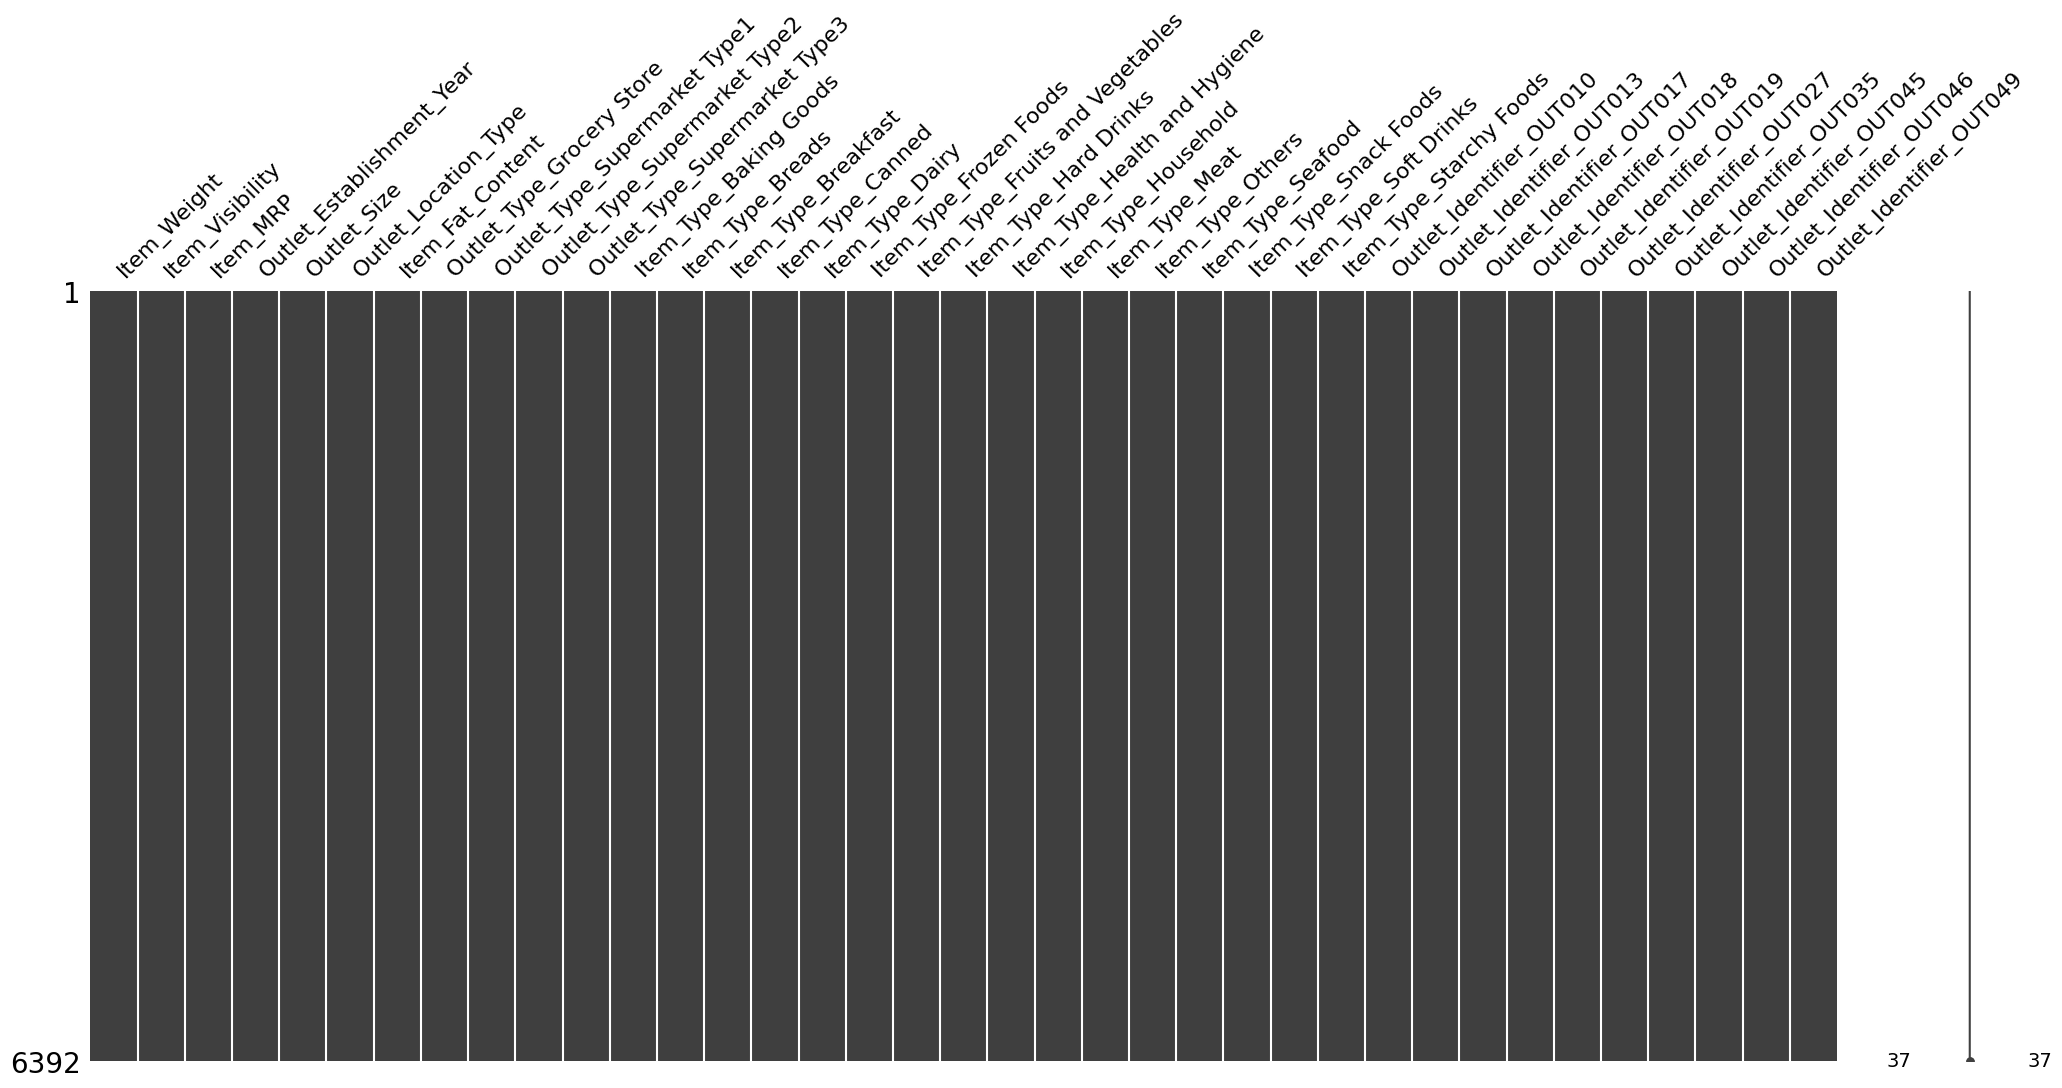

In [71]:
#checking missing values
missingno.matrix(X_train_tf)

<Axes: >

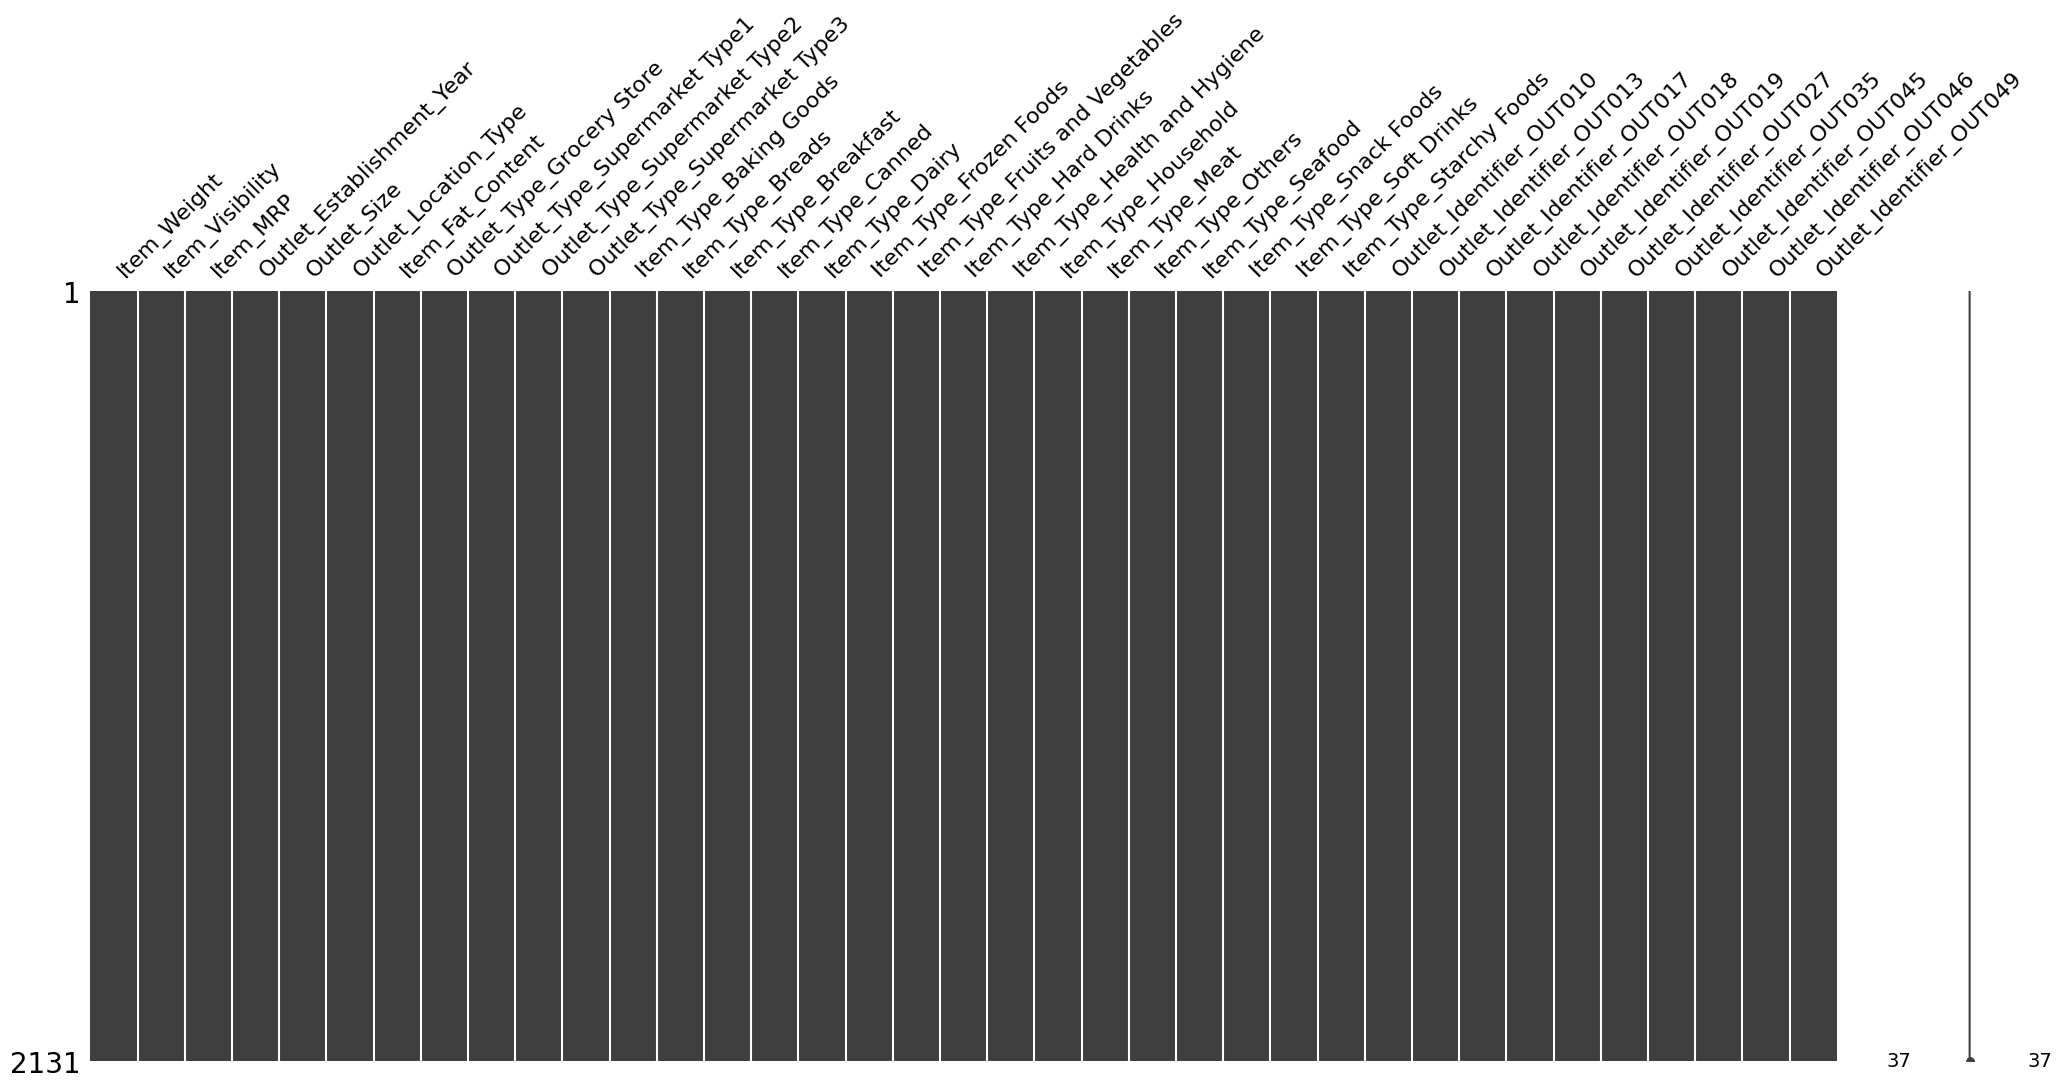

In [72]:
#checking missing values
missingno.matrix(X_test_tf)